#  Programming for Data Analysis 
## Diarmuid Whelan Assignment 26-11-2018
This Jupyter notebook will examine Padraig Harrington's finishing position in professional golf tournaments using the python numpy.random package. The goal of this notebook is to
    - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data
    points across at least four different variables.
    - Investigate the types of variables involved, their likely distributions, and their relationships with each
    other.
    - Synthesise/simulate a data set as closely matching their properties as possible.
    - Detail your research and implement the simulation in a Jupyter notebook 
    – the data set itself can simply be displayed in an output cell within the notebook.
 

## The Dataset
Padraig Harrington is one of Ireland's most successful professional athletes, winning 31 professional titles including 3 major championships and rising as far as world number 3 in World Golf Rankings. Harrington has represented Ireland at the Olympics and played on several Ryder Cup teams. Much analysis has been done in modelling professional golfer's scoring and finishing positions. The finishing position of a player can be influenced by a number of factors - adjusted score in rounds 1, 2, 3 and 4 - to name a few. In an attempt to simulate these influencing factors I will base this analysis on a dataset of Padraig Harrington's professional results over the last 22 years, covering 619 tournaments. The data is scraped from tour-tips.com using the golf_scraper.py file in this repository. Adjusted round scores modifies a players score using the average field score on that day. Adjusted scores for each round are a better measure of how a player has performed than raw scores because they are relative to the rest of the field and thus take into account conditions like weather and difficulty of course.

In [1]:
#Load dataset and packages
import pandas
import numpy
import matplotlib.pyplot as pl
#Open the padraig_harrington.CSV FILE 
#scraped from tour-tips.com
golf=pandas.read_csv('/Users/diarmuid/Padraig_Harrington.csv',delimiter=',')
print(golf)
#Print the shape of the data
print(golf.shape)
#remove columns not required
golf.drop(golf.columns[[0,1, 2, 3,4,5,7,8,9,10,11,12,13,18,19]], axis=1, inplace=True)
golf.head


     Unnamed: 0         date                                 event  \
0             0  18-Nov-2018                           RSM Classic   
1             1  11-Nov-2018                Nedbank Golf Challenge   
2             2  04-Nov-2018                 Turkish Airlines Open   
3             3  21-Oct-2018                     Andalucia Masters   
4             4  14-Oct-2018                       British Masters   
5             5  07-Oct-2018     Alfred Dunhill Links Championship   
6             6  23-Sep-2018                      Portugal Masters   
7             7  16-Sep-2018                              KLM Open   
8             8  26-Aug-2018                         Czech Masters   
9             9  19-Aug-2018                  Wyndham Championship   
10           10  12-Aug-2018                      PGA Championship   
11           11  05-Aug-2018                Barracuda Championship   
12           12  22-Jul-2018                          British Open   
13           13  15-

<bound method NDFrame.head of     fin_pos  adj_r1_score  adj_r2_score  adj_r3_score  adj_r4_score
0        mc          73.2          67.5           NaN           NaN
1        35          70.0          71.3          71.6          67.8
2        35          65.4          71.3          72.2          72.8
3        66          70.9          72.7          72.9           NaN
4        22          70.8          70.3          68.9          67.4
5         7          65.6          72.4          69.5          67.1
6        mc          74.1          70.4           NaN           NaN
7         5          68.5          69.3          65.0          68.9
8         2          67.6          68.4          65.1          69.2
9        mc          70.6          73.7           NaN           NaN
10       mc          69.2          69.9           NaN           NaN
11       50          70.5          72.3          68.1          70.9
12       mc          72.4          70.8           NaN           NaN
13       mc       

## Variables
#### Round X Adjusted Score
Intuitively a player's adjusted round score will have a massive impact on the player's finishing position. Lower adjusted round scores will leave a player higher up the leaderboard and reduce the likelihood of missing a cut.

##### Round 1 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 1 Adjusted Score ranges from 61.2 to 79.9 with a mean of 70.2 and standard deviation of 2.79 and is summarised as follows:

In [2]:
golf['adj_r1_score'].describe()


count    601.000000
mean      70.112646
std        2.788537
min       61.200000
25%       68.300000
50%       70.200000
75%       71.800000
max       79.900000
Name: adj_r1_score, dtype: float64

##### Round 2 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 2 Adjusted Score ranges from 61.8 to 81.9 with a mean of 70.26 and standard deviation of 2.81 and is summarised as follows:

In [3]:
golf['adj_r2_score'].describe()

count    601.000000
mean      70.261398
std        2.809610
min       61.800000
25%       68.400000
50%       70.200000
75%       72.200000
max       81.900000
Name: adj_r2_score, dtype: float64

##### Round 3 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 3 Adjusted Score ranges from 63.2 to 78.9 with a mean of 70.63 and standard deviation of 2.86 and is summarised as follows:

In [4]:
golf['adj_r3_score'].describe()


count    459.000000
mean      70.627887
std        2.855472
min       63.200000
25%       68.800000
50%       70.500000
75%       72.600000
max       78.900000
Name: adj_r3_score, dtype: float64

#### Round 4 Adjusted Score
Is a numerical random variable. In this dataset, Padraig Harrington's Round 2 Adjusted Score ranges from 62.5 to 80.5 with a mean of 70.68 and standard deviation of 2.85 and is summarised as follows:

In [5]:
golf['adj_r4_score'].describe()

count    434.000000
mean      70.683641
std        2.847881
min       62.500000
25%       68.800000
50%       70.800000
75%       72.475000
max       80.500000
Name: adj_r4_score, dtype: float64

It is interesting that adjusted round score mean and standard deviations increase as the rounds go on. Harrington looks to play his best golf in round 1. This amy be a quirk of the data but is something I would not ahve expected, especially for someone whom ahs been so prolific in winning tournaments.

### Relationships and Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1032960b8>,
      dtype=object)

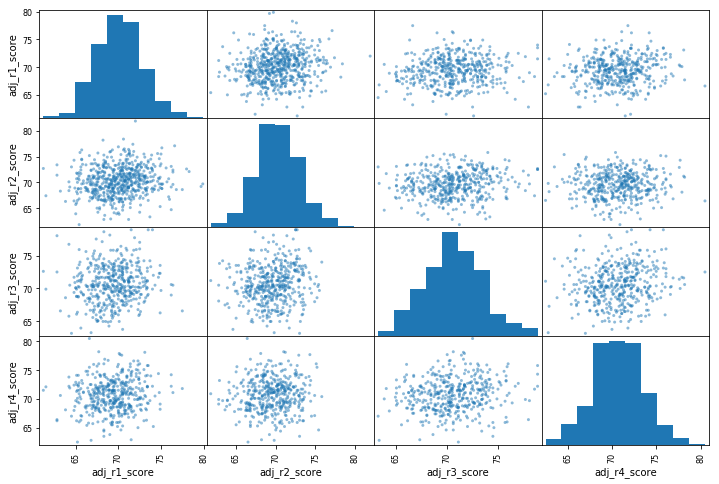

In [6]:
#PLOT THE DISTRIBUTION OF EACH VARIABLE AND THE RELATIONHSIPS BETWEEN THEM

from pandas.plotting import scatter_matrix #Load scatter matrix module
attributes = ["fin_pos", "adj_r1_score", "adj_r2_score", "adj_r3_score","adj_r4_score"] #isolate the attributes required
scatter_matrix(golf[attributes], figsize=(12, 8))

The four variables look to be normally distributed around their means. Examining the correlations between each variable more closely we see fairly random relationships. Commentators and analysts often use a player's previous day score as a predictor for future scores but this looks to be disproved here. By the looks of the scatter plots their is no striking relationship and whatever persistence effect that exists is small and there seems to be a reversion to the mean effect. In each of the below plots we observe a slight positive correlation.

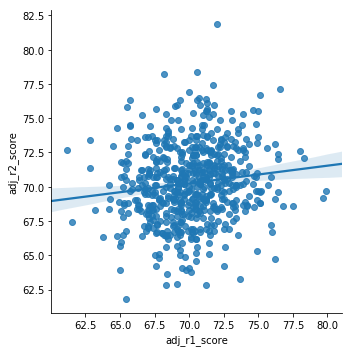

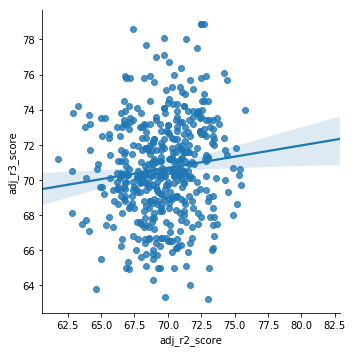

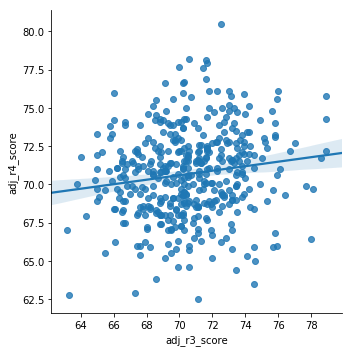

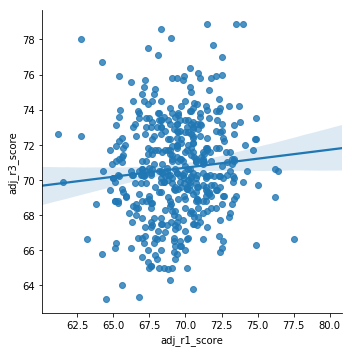

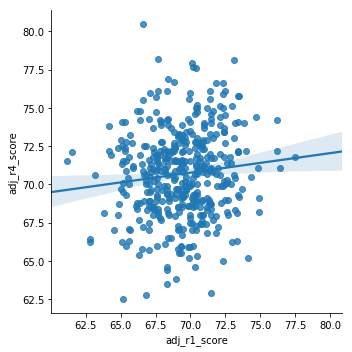

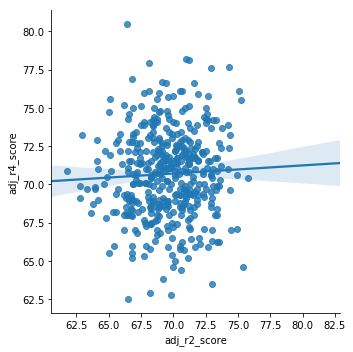

In [7]:

import seaborn as sns #Load Seaborn package for interesting plots
#Print correlation plots with line of best fit  and confidence interval for all combinations of adjusted round scores
sns.lmplot(x="adj_r1_score", y="adj_r2_score", data=golf)
sns.lmplot(x="adj_r2_score", y="adj_r3_score", data=golf)
sns.lmplot(x="adj_r3_score", y="adj_r4_score", data=golf)
sns.lmplot(x="adj_r1_score", y="adj_r3_score", data=golf)
sns.lmplot(x="adj_r1_score", y="adj_r4_score", data=golf)
sns.lmplot(x="adj_r2_score", y="adj_r4_score", data=golf)


We can model the relationship between the 4 adjusted round scores and Padraig Harrington's finishing position to develop a predictive model. Below we can see the implementation of a number of different methods to model the relationship between adjusted round scores and finishing position. First we need to clean up the dataset and remove all tournaments where Padraig Harrington didn't complete 4 rounds through either missed cuts or withdrawals.

In [18]:
data =golf[golf['fin_pos'] !='mc'] #remove all missed cuts
data =golf[numpy.isfinite(golf['adj_r3_score'])] # remove any tournaments without a rd 3 adjusted score
data =golf[numpy.isfinite(golf['adj_r4_score'])] # remove any tournaments without a rd 4 adjusted score
#print(data)


X = data[['adj_r1_score', 'adj_r2_score', 'adj_r3_score', 'adj_r4_score']] #explanatory variables
Y = data['fin_pos'] # target variable
from sklearn.model_selection import train_test_split #used to split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# takes 30% of the dataset to test models on

#Model 1 Linear regression
#Most commonly known and simple regression technique and a good starting point

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
#See how predictive the linear model is (what % of variance can be explained by the 4 adjusted round scores)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))
#Calculate some error scores to test the robustness of the model
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = numpy.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


#Model 2 Random Forests
#Machine Learning technique
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = numpy.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)


#Model 3 Gradient Boosting
#Machine Learning technique
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = numpy.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)





#Calculate the importance of the 4 features in predicting finishing positions
feature_labels = numpy.array(['adj_r1_score', 'adj_r2_score', 'adj_r3_score', 'adj_r4_score'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    

Linear Regression R squared": 0.4937
Linear Regression RMSE: 15.5155
Linear Regression MAE: 12.1287
Random Forest R squared": 0.3541
Random Forest RMSE: 17.5259
Gradient Boosting R squared": 0.4297
Gradient Boosting RMSE: 16.4671
adj_r3_score-23.16%
adj_r4_score-24.93%
adj_r1_score-25.45%
adj_r2_score-26.45%


Assessing the predictive power of each model the Linear Regression comes out on top, but with less than stellar results. An R squared value of 49% means we can predict almost half of the variance in finishing positions for Padraig Harrington using the round adjusted scores. Root mean squared error of 15.52 means we can be fairly confident of predicting the finishing position within 15 positions above or below. Both the random forest and gradient boosting methods perform somewhat disappointingly. Looking at the importance of the variables to predicting finishing position, it is fairly evenly spread, as expected.

Neural Network R squared": 0.0239
Neural Network RMSE: 21.5440


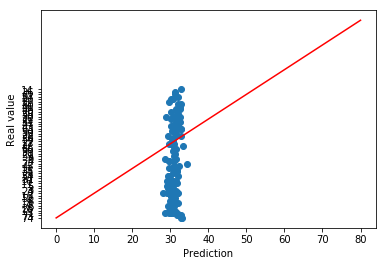

In [20]:
#Model 4 Neural Network
#Multi-layer Perception regressor. Attempts to optimizes the squared-loss using LBFGS or stochastic gradient descent.
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Neural Network R squared": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = numpy.sqrt(model_mse)
print('Neural Network RMSE: %.4f' % model_rmse)

y_pred = model.predict(X_test)


# Build a plot  of prediction vs actual value with prediction line added
pl.scatter(y_pred, y_test)
pl.xlabel('Prediction')
pl.ylabel('Real value')
diagonal = numpy.linspace(0, 80, 10)
pl.plot(diagonal, diagonal, '-r')
pl.show()


Neural networks, multi-layer perception regression doesn't perform much better than the linear regression model.

## Simulating the Dataset
Simulating 4 normal random variables with means and standard deviations observed above we can make predictions about Padraig Harrington's finishing positions based on these using the linear regression model trained above. 

In [10]:
#Simulate normal distribuitons with means and std dev observed above for each round
rd_1 = numpy.random.normal(loc=numpy.mean(golf['adj_r1_score']), scale=numpy.std(golf['adj_r1_score']), size=100000)
rd_2 = numpy.random.normal(loc=numpy.mean(golf['adj_r2_score']), scale=numpy.std(golf['adj_r2_score']), size=100000)
rd_3 = numpy.random.normal(loc=numpy.mean(golf['adj_r3_score']), scale=numpy.std(golf['adj_r3_score']), size=100000)
rd_4 = numpy.random.normal(loc=numpy.mean(golf['adj_r4_score']), scale=numpy.std(golf['adj_r4_score']), size=100000)
#combine these into a dataframe
dataset = pandas.DataFrame({'rd_1': rd_1, 'rd_2': rd_2, 'rd_3': rd_3, 'rd_4': rd_4}, columns=['rd_1', 'rd_2','rd_3', 'rd_4'])
#dataset simulated
print(dataset)

#First simulation
print(dataset[:1])


y_pred = regressor.predict(dataset[:1])

print('Predicted finishing position if shoots above rounds: %.0fth' % y_pred)

            rd_1       rd_2       rd_3       rd_4
0      68.792953  67.961152  70.846345  67.488794
1      67.740620  71.217276  68.302434  71.323979
2      66.862876  70.952030  67.692183  72.817109
3      68.731579  71.752306  72.481121  75.071771
4      74.147911  63.551374  69.450340  71.424524
5      72.210254  67.284553  69.933881  72.582514
6      72.723396  70.538929  71.548812  67.985094
7      69.234484  70.605404  74.790157  75.328977
8      68.261974  74.454560  66.164461  70.832162
9      70.442304  71.394083  74.167103  76.448631
10     76.459011  71.698670  73.202641  70.785589
11     67.306041  72.736338  72.329116  65.632242
12     71.354563  71.391296  73.658243  72.950435
13     67.842553  68.453664  72.944541  65.460752
14     70.285329  69.542662  67.633839  72.060363
15     68.051900  70.814668  71.352670  71.682578
16     70.697075  72.153063  68.831938  69.283013
17     66.288996  68.787685  69.564140  70.205463
18     68.703808  77.747658  70.885480  75.520570


Obviously this model is fairly rough and there are other important factors required to model finishing positions.

## References
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html